# Customer Lifetime Value by RFM

In [2]:
# importing essential libraries
import pandas as pd
import numpy as np
import warnings
import xlrd
warnings.filterwarnings('ignore')
import csv

In [3]:
data= pd.read_csv('dataset_from_impala.csv ') 
data

,order_num,orderentry_num,productgroup,created_date,orderentry_revenue,user_id,customer_type,order_status,nettotalprice
0,180522-31324094,0,IM,5/22/2018,1074.000000,001cf,REGISTERED,COMPLETED,976.359985
1,180324-31208188,0,IM,3/24/2018,4871.750000,001gt,GUEST,COMPLETED,4428.859863
2,180324-31214305,0,IM,4/21/2018,4384.250000,001gt,GUEST,COMPLETED,3985.679932
3,180308-31159160,0,IM,3/9/2018,4438.120117,001gt,GUEST,COMPLETED,4034.649902
4,180308-31159160,1,IM,3/9/2018,433.630005,001gt,GUEST,COMPLETED,394.209992
...,...,...,...,...,...,...,...,...,...
31634,180302-31120691,1,IM,3/2/2018,85.879997,zulki,GUEST,COMPLETED,78.070000
31635,180308-31159073,1,IM,3/8/2018,1239.650024,zwizz,GUEST,COMPLETED,1126.949951
31636,180308-31159073,0,IM,3/8/2018,109.349998,zwizz,GUEST,COMPLETED,99.410004
31637,180510-31283695,0,IM,5/10/2018,1349.000000,zzil2,GUEST,COMPLETED,1226.359985


In [4]:
df2= pd.DataFrame(data)
df2.head(20)


,order_num,orderentry_num,productgroup,created_date,orderentry_revenue,user_id,customer_type,order_status,nettotalprice
0,180522-31324094,0,IM,5/22/2018,1074.000000,001cf,REGISTERED,COMPLETED,976.359985
1,180324-31208188,0,IM,3/24/2018,4871.750000,001gt,GUEST,COMPLETED,4428.859863
2,180324-31214305,0,IM,4/21/2018,4384.250000,001gt,GUEST,COMPLETED,3985.679932
3,180308-31159160,0,IM,3/9/2018,4438.120117,001gt,GUEST,COMPLETED,4034.649902
4,180308-31159160,1,IM,3/9/2018,433.630005,001gt,GUEST,COMPLETED,394.209992
5,180402-31223588,0,IM,4/3/2018,1074.000000,0021c,REGISTERED,COMPLETED,976.359985
6,180227-31100862,1,IM,2/27/2018,110.250000,002ef,REGISTERED,COMPLETED,100.230003
7,180227-31100862,0,IM,2/27/2018,1388.750000,002ef,REGISTERED,COMPLETED,1262.500000
8,180308-31147406,0,IM,3/8/2018,109.349998,3.00E+08,REGISTERED,COMPLETED,99.410004
9,180308-31147406,1,IM,3/8/2018,1239.650024,3.00E+08,REGISTERED,COMPLETED,1126.949951


In [5]:
dfwee=df2
dfwee

,order_num,orderentry_num,productgroup,created_date,orderentry_revenue,user_id,customer_type,order_status,nettotalprice
0,180522-31324094,0,IM,5/22/2018,1074.000000,001cf,REGISTERED,COMPLETED,976.359985
1,180324-31208188,0,IM,3/24/2018,4871.750000,001gt,GUEST,COMPLETED,4428.859863
2,180324-31214305,0,IM,4/21/2018,4384.250000,001gt,GUEST,COMPLETED,3985.679932
3,180308-31159160,0,IM,3/9/2018,4438.120117,001gt,GUEST,COMPLETED,4034.649902
4,180308-31159160,1,IM,3/9/2018,433.630005,001gt,GUEST,COMPLETED,394.209992
...,...,...,...,...,...,...,...,...,...
31634,180302-31120691,1,IM,3/2/2018,85.879997,zulki,GUEST,COMPLETED,78.070000
31635,180308-31159073,1,IM,3/8/2018,1239.650024,zwizz,GUEST,COMPLETED,1126.949951
31636,180308-31159073,0,IM,3/8/2018,109.349998,zwizz,GUEST,COMPLETED,99.410004
31637,180510-31283695,0,IM,5/10/2018,1349.000000,zzil2,GUEST,COMPLETED,1226.359985


In [6]:
#df2=df

# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.
RECENCY (R): Days since last purchase. you have to subtract last purchase date from today's date. 
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money this customer spent.
We will create those 3 customer attributes for each customer.

In [8]:
# finding maximum created date from each customer group
recency_df1 = df2.groupby(by='user_id', as_index=False)['created_date'].max()
recency_df1=recency_df1.rename(columns={'created_date':'max_created_date'})
recency_df1

,user_id,max_created_date
0,0.00E+00,5/19/2018
1,001cf,5/22/2018
2,001gt,4/21/2018
3,0021c,4/3/2018
4,002ef,2/27/2018
...,...,...
13297,ztale,5/10/2018
13298,zulfa,4/18/2018
13299,zulki,3/2/2018
13300,zwizz,3/8/2018


In [9]:
## finding minimum created date from each customer group
recency_df2 = data2.groupby(by='user_id', as_index=False)['created_date'].min()
recency_data2=recency_df2.rename(columns={'created_date':'min_created_date'})
recency_df2

,user_id,min_created_date
0,0.00E+00,1/2/2018
1,001cf,5/22/2018
2,001gt,3/24/2018
3,0021c,4/3/2018
4,002ef,2/27/2018
...,...,...
13297,ztale,5/10/2018
13298,zulfa,4/18/2018
13299,zulki,3/2/2018
13300,zwizz,3/8/2018


In [10]:
# combining the above 2 dataframes
recency_df3_first=recency_df1.merge(recency_df2, left_on='user_id', right_on='user_id', how='outer')
recency_df3_first

,user_id,max_created_date,min_created_date
0,0.00E+00,5/19/2018,1/2/2018
1,001cf,5/22/2018,5/22/2018
2,001gt,4/21/2018,3/24/2018
3,0021c,4/3/2018,4/3/2018
4,002ef,2/27/2018,2/27/2018
...,...,...,...
13297,ztale,5/10/2018,5/10/2018
13298,zulfa,4/18/2018,4/18/2018
13299,zulki,3/2/2018,3/2/2018
13300,zwizz,3/8/2018,3/8/2018


In [11]:
##df_new=df2[['user_id','productgroup']]
#df_new

In [12]:
#df_new1=df_new.drop_duplicates(subset=None, keep='first', inplace=False)
#df_new1

In [13]:
#recency_df3=recency_df3_first.merge(df_new1, left_on='user_id', right_on='user_id', how='outer')
#recency_df3

In [14]:
# this step is essential to change min_created_date and max_created_date to date format since the former 2 are strings, 
#couldn't useful to calculate difference between 2 dates
import pandas as pd
recency_df3_first['new_max_date'] = pd.DatetimeIndex(recency_df3_first['max_created_date']).date
recency_df3_first['new_min_date'] = pd.DatetimeIndex(recency_df3_first['min_created_date']).date
recency_df3_first

,user_id,max_created_date,min_created_date,new_max_date,new_min_date
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27
...,...,...,...,...,...
13297,ztale,5/10/2018,5/10/2018,2018-05-10,2018-05-10
13298,zulfa,4/18/2018,4/18/2018,2018-04-18,2018-04-18
13299,zulki,3/2/2018,3/2/2018,2018-03-02,2018-03-02
13300,zwizz,3/8/2018,3/8/2018,2018-03-08,2018-03-08


In [15]:
print(recency_df3_first.dtypes)

user_id             object
max_created_date    object
min_created_date    object
new_max_date        object
new_min_date        object
dtype: object


In [16]:
from datetime import date
dt=date.today()
print(dt)
recency_df3_first['Recency'] = recency_df3_first['new_max_date'].apply(lambda x: (dt - x).days)
recency_df3_first.head()

2025-01-08


,user_id,max_created_date,min_created_date,new_max_date,new_min_date,Recency
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2426
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2423
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2454
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2472
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2507


In [17]:
recency_df4=recency_df3_first
recency_df4

,user_id,max_created_date,min_created_date,new_max_date,new_min_date,Recency
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2426
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2423
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2454
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2472
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2507
...,...,...,...,...,...,...
13297,ztale,5/10/2018,5/10/2018,2018-05-10,2018-05-10,2435
13298,zulfa,4/18/2018,4/18/2018,2018-04-18,2018-04-18,2457
13299,zulki,3/2/2018,3/2/2018,2018-03-02,2018-03-02,2504
13300,zwizz,3/8/2018,3/8/2018,2018-03-08,2018-03-08,2498


In [18]:
import numpy as np
rfmTable1 = dfwee.groupby(['user_id']).agg({'order_num': lambda x: x.nunique(),# Frequency 
                                        'nettotalprice': lambda x: x.sum()}) # Monetary Value


In [19]:
rfmTable1

,order_num,nettotalprice
user_id,,
0.00E+00,3,3424.549969
001cf,1,976.359985
001gt,3,12843.399689
0021c,1,976.359985
002ef,1,1362.730003
...,...,...
ztale,1,472.000000
zulfa,1,599.500000
zulki,1,797.129997


In [20]:
rfmTable1=rfmTable1.rename(columns={'order_num':'Frequency', 'nettotalprice':'Monetary' })
rfmTable1

,Frequency,Monetary
user_id,,
0.00E+00,3,3424.549969
001cf,1,976.359985
001gt,3,12843.399689
0021c,1,976.359985
002ef,1,1362.730003
...,...,...
ztale,1,472.000000
zulfa,1,599.500000
zulki,1,797.129997


In [21]:
result = pd.merge(recency_df4, rfmTable1, how='outer', on=['user_id'])
result



,user_id,max_created_date,min_created_date,new_max_date,new_min_date,Recency,Frequency,Monetary
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2426,3,3424.549969
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2423,1,976.359985
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2454,3,12843.399689
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2472,1,976.359985
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2507,1,1362.730003
...,...,...,...,...,...,...,...,...
13297,ztale,5/10/2018,5/10/2018,2018-05-10,2018-05-10,2435,1,472.000000
13298,zulfa,4/18/2018,4/18/2018,2018-04-18,2018-04-18,2457,1,599.500000
13299,zulki,3/2/2018,3/2/2018,2018-03-02,2018-03-02,2504,1,797.129997
13300,zwizz,3/8/2018,3/8/2018,2018-03-08,2018-03-08,2498,1,1226.359955


In [22]:
result=result.rename(columns={'order_num':'Frequency', 'nettotalprice':'Monetary' })
result

,user_id,max_created_date,min_created_date,new_max_date,new_min_date,Recency,Frequency,Monetary
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2426,3,3424.549969
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2423,1,976.359985
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2454,3,12843.399689
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2472,1,976.359985
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2507,1,1362.730003
...,...,...,...,...,...,...,...,...
13297,ztale,5/10/2018,5/10/2018,2018-05-10,2018-05-10,2435,1,472.000000
13298,zulfa,4/18/2018,4/18/2018,2018-04-18,2018-04-18,2457,1,599.500000
13299,zulki,3/2/2018,3/2/2018,2018-03-02,2018-03-02,2504,1,797.129997
13300,zwizz,3/8/2018,3/8/2018,2018-03-08,2018-03-08,2498,1,1226.359955


In [23]:
result.dtypes

user_id              object
max_created_date     object
min_created_date     object
new_max_date         object
new_min_date         object
Recency               int64
Frequency             int64
Monetary            float64
dtype: object

In [24]:
rfmTable_additional= result[['user_id','new_max_date','new_min_date']]
rfmTable_additional.drop_duplicates(subset=None, keep='first', inplace=False)

,user_id,new_max_date,new_min_date
0,0.00E+00,2018-05-19,2018-01-02
1,001cf,2018-05-22,2018-05-22
2,001gt,2018-04-21,2018-03-24
3,0021c,2018-04-03,2018-04-03
4,002ef,2018-02-27,2018-02-27
...,...,...,...
13297,ztale,2018-05-10,2018-05-10
13298,zulfa,2018-04-18,2018-04-18
13299,zulki,2018-03-02,2018-03-02
13300,zwizz,2018-03-08,2018-03-08


In [25]:
rfmTable = result[['user_id','Recency', 'Frequency','Monetary']]
#rfmTable
rfmTable.sort_values('Recency', ascending=True)

,user_id,Recency,Frequency,Monetary
8267,edisk,2384,1,981.090027
285,0d467,2384,1,2290.090088
8805,fai.t,2384,7,6016.880091
4619,9d67f,2384,1,1445.729988
2621,5adbb,2384,1,362.730011
...,...,...,...,...
3530,7941f,2564,1,252.680000
6280,brown,2564,1,1271.819946
2489,55bfb,2564,1,40.500000
2414,5341c,2564,1,72.600000


In [26]:

rfmTable.dtypes

user_id       object
Recency        int64
Frequency      int64
Monetary     float64
dtype: object

# Customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use Quartiles. 
We assign a score from 1 to 4 to Recency, Frequency and Monetary. 
1 is the best/highest value, and 4 is the lowest/worst value.
A final RFM score is calculated simply by combining individual RFMClass numbers.
Note: Quantiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.



In statistics and the theory of probability, quantiles are cutpoints dividing the range of a probability distribution into contiguous intervals with equal probabilities, 
or dividing the observations in a sample in the same way. There are one fewer quantiles than the number of groups created. 
Thus quartiles are the three cut points that will divide a dataset into four equal-size groups.


In [28]:
#RFM Quartiles
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75], numeric_only=True)
quantiles

,Recency,Frequency,Monetary
0.25,2434.0,1.0,244.550003
0.50,2491.0,1.0,1090.000000
0.75,2503.0,1.0,1298.179985


In [29]:
quantiles.to_dict()

{'Recency': {0.25: 2434.0, 0.5: 2491.0, 0.75: 2503.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 244.5500031, 0.5: 1090.0, 0.75: 1298.17998469}}

# Definitions for customer segments:
1. Best Customers - Bought most recently and most often, and spend the most
2. Loyal Customers - Buy most frequently
3. Big Spenders - Spend the most
4. Recent Customers - Bought more recently
5. Almost Lost - Haven’t purchased for somewhat some time, but purchased some what frequently and spend the somewhat the most
6. Lost Customers - Haven’t purchased for some time, but purchased frequently and spend the most
7. Lost but low revenue generated Customers - Last purchased long ago, purchased few, and spent little
8. Others - The people who are not having the above scores will come to others category. This has to be filtered in Tableau


In [31]:
#extra
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [32]:
rfmSegmentation1=rfmTable
rfmSegmentation1['R_Quartile'] = rfmSegmentation1['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation1['F_Quartile'] = rfmSegmentation1['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation1['M_Quartile'] = rfmSegmentation1['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [33]:
rfmSegmentation1['RFMClass'] = rfmSegmentation1.R_Quartile.map(str) \
                            + rfmSegmentation1.F_Quartile.map(str) \
                            + rfmSegmentation1.M_Quartile.map(str)

In [34]:
rfmSegmentation1

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,0.00E+00,2426,3,3424.549969,1,1,1,111
1,001cf,2423,1,976.359985,1,4,3,143
2,001gt,2454,3,12843.399689,2,1,1,211
3,0021c,2472,1,976.359985,2,4,3,243
4,002ef,2507,1,1362.730003,4,4,1,441
...,...,...,...,...,...,...,...,...
13297,ztale,2435,1,472.000000,2,4,3,243
13298,zulfa,2457,1,599.500000,2,4,3,243
13299,zulki,2504,1,797.129997,4,4,3,443
13300,zwizz,2498,1,1226.359955,3,4,2,342


In [35]:
result_newt111 = pd.merge(rfmSegmentation1, result, how='outer', on=['user_id','Monetary'])
result_newt3=result_newt111.drop_duplicates()

In [36]:
result_newt3.drop_duplicates()

,user_id,Recency_x,Frequency_x,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,max_created_date,min_created_date,new_max_date,new_min_date,Recency_y,Frequency_y
0,0.00E+00,2426,3,3424.549969,1,1,1,111,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2426,3
1,001cf,2423,1,976.359985,1,4,3,143,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2423,1
2,001gt,2454,3,12843.399689,2,1,1,211,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2454,3
3,0021c,2472,1,976.359985,2,4,3,243,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2472,1
4,002ef,2507,1,1362.730003,4,4,1,441,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13297,ztale,2435,1,472.000000,2,4,3,243,5/10/2018,5/10/2018,2018-05-10,2018-05-10,2435,1
13298,zulfa,2457,1,599.500000,2,4,3,243,4/18/2018,4/18/2018,2018-04-18,2018-04-18,2457,1
13299,zulki,2504,1,797.129997,4,4,3,443,3/2/2018,3/2/2018,2018-03-02,2018-03-02,2504,1
13300,zwizz,2498,1,1226.359955,3,4,2,342,3/8/2018,3/8/2018,2018-03-08,2018-03-08,2498,1


In [37]:
del result_newt3['Recency_y']
del result_newt3['Frequency_y']

In [38]:
result_newt3

,user_id,Recency_x,Frequency_x,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,max_created_date,min_created_date,new_max_date,new_min_date
0,0.00E+00,2426,3,3424.549969,1,1,1,111,5/19/2018,1/2/2018,2018-05-19,2018-01-02
1,001cf,2423,1,976.359985,1,4,3,143,5/22/2018,5/22/2018,2018-05-22,2018-05-22
2,001gt,2454,3,12843.399689,2,1,1,211,4/21/2018,3/24/2018,2018-04-21,2018-03-24
3,0021c,2472,1,976.359985,2,4,3,243,4/3/2018,4/3/2018,2018-04-03,2018-04-03
4,002ef,2507,1,1362.730003,4,4,1,441,2/27/2018,2/27/2018,2018-02-27,2018-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...
13297,ztale,2435,1,472.000000,2,4,3,243,5/10/2018,5/10/2018,2018-05-10,2018-05-10
13298,zulfa,2457,1,599.500000,2,4,3,243,4/18/2018,4/18/2018,2018-04-18,2018-04-18
13299,zulki,2504,1,797.129997,4,4,3,443,3/2/2018,3/2/2018,2018-03-02,2018-03-02
13300,zwizz,2498,1,1226.359955,3,4,2,342,3/8/2018,3/8/2018,2018-03-08,2018-03-08


In [39]:
result_newt3.to_csv('clv_result_training.csv')

In [40]:
# This part is only for our validation. But in tableau we've to use the code displayed after this cell
"""How many customers do we have in each segment?"""
print("Best Customers: ",len(result_newt3[result_newt3['RFMClass']=='111']))
print('Loyal Customers: ',len(result_newt3[result_newt3['F_Quartile']==1]))
print("Big Spenders: ",len(result_newt3[result_newt3['M_Quartile']==1]))
print("One Time Customers: ",len(result_newt3[result_newt3['R_Quartile']==1]))
print('Almost Lost: ', len(result_newt3[result_newt3['RFMClass']=='311']))
print('Lost but high revenue generated Customers: ',len(result_newt3[result_newt3['RFMClass']=='411']))
print('Lost but low revenue generated Customers: ',len(result_newt3[result_newt3['RFMClass']=='434']))

Best Customers:  833
Loyal Customers:  2150
Big Spenders:  3312
One Time Customers:  3342
Almost Lost:  286
Lost but high revenue generated Customers:  79
Lost but low revenue generated Customers:  0


In [41]:
"""
https://community.tableau.com/thread/229984
use the following code in tableau
IF REGEXP_MATCH(STR([RFMClass]),'111') THEN "Best Customers"

ELSEIF [RFMClass]=311 THEN "Almost Lost"

ELSEIF [RFMClass]=411 THEN "Lost but high revenue generated Customers"

ELSEIF [RFMClass]=444 OR REGEXP_MATCH(STR([RFMClass]),'4[3-4][3-4]')  THEN "Lost but low revenue generated Customers"

ELSEIF REGEXP_MATCH(STR([RFMClass]),'1[1-4][1-4]') THEN "Recent Customers"

ELSEIF REGEXP_MATCH(STR([RFMClass]),'[1-4]1[1-4]') THEN "Loyal Customers"

ELSEIF REGEXP_MATCH(STR([RFMClass]),'[1-4][1-4]1') THEN "Big Spenders"

ELSE "Others"

END
"""



'\nhttps://community.tableau.com/thread/229984\nuse the following code in tableau\nIF REGEXP_MATCH(STR([RFMClass]),\'111\') THEN "Best Customers"\n\nELSEIF [RFMClass]=311 THEN "Almost Lost"\n\nELSEIF [RFMClass]=411 THEN "Lost but high revenue generated Customers"\n\nELSEIF [RFMClass]=444 OR REGEXP_MATCH(STR([RFMClass]),\'4[3-4][3-4]\')  THEN "Lost but low revenue generated Customers"\n\nELSEIF REGEXP_MATCH(STR([RFMClass]),\'1[1-4][1-4]\') THEN "Recent Customers"\n\nELSEIF REGEXP_MATCH(STR([RFMClass]),\'[1-4]1[1-4]\') THEN "Loyal Customers"\n\nELSEIF REGEXP_MATCH(STR([RFMClass]),\'[1-4][1-4]1\') THEN "Big Spenders"\n\nELSE "Others"\n\nEND\n'

In [42]:
# https://www.putler.com/docs/rfm-segmentation/

"""IF REGEXP_MATCH(STR([RFM Class.]),'111') THEN "Best Customers"
ELSEIF [RFM Class.] = 411 THEN "Can't Lose Them"
ELSEIF [RFM Class.] = 444 THEN "Lost Customers"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'24[1-2]') THEN "Customers Needing Attention"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[1-2][1-2][1-2]') THEN "Loyal Customers"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'1[1-4]1') THEN "Potential Loyalist"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[1-2][3-4][1-4]') THEN "Recent Customers"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[1-2][1-2][3-4]') THEN "Promising Customers"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[3-4][3-4][3-4]') THEN "About to Quit"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[3-4][1-2][1-2]') THEN "At Risk"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[1-4][1-4][1-2]') THEN "Big Spenders"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[3-4][1][3-4]') THEN "Hibernating"
ELSE "Others"
END
"""

'IF REGEXP_MATCH(STR([RFM Class.]),\'111\') THEN "Best Customers"\nELSEIF [RFM Class.] = 411 THEN "Can\'t Lose Them"\nELSEIF [RFM Class.] = 444 THEN "Lost Customers"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'24[1-2]\') THEN "Customers Needing Attention"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[1-2][1-2][1-2]\') THEN "Loyal Customers"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'1[1-4]1\') THEN "Potential Loyalist"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[1-2][3-4][1-4]\') THEN "Recent Customers"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[1-2][1-2][3-4]\') THEN "Promising Customers"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[3-4][3-4][3-4]\') THEN "About to Quit"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[3-4][1-2][1-2]\') THEN "At Risk"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[1-4][1-4][1-2]\') THEN "Big Spenders"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[3-4][1][3-4]\') THEN "Hibernating"\nELSE "Others"\nEND\n'

# Q-1

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, classification_report, roc_auc_score, r2_score, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt



In [11]:
df = pd.read_csv("dataset_from_impala.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31639 entries, 0 to 31638
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_num           31639 non-null  object 
 1   orderentry_num      31639 non-null  int64  
 2   productgroup        31592 non-null  object 
 3   created_date        31639 non-null  object 
 4   orderentry_revenue  31639 non-null  float64
 5   user_id             31639 non-null  object 
 6   customer_type       31639 non-null  object 
 7   order_status        31639 non-null  object 
 8   nettotalprice       31639 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 2.2+ MB


In [12]:

df['created_date'] = pd.to_datetime(df['created_date'])
df['day_of_week'] = df['created_date'].dt.dayofweek
df['month'] = df['created_date'].dt.month

df.sort_values(by=['user_id', 'created_date'], inplace=True)
df['next_week_date'] = df.groupby('user_id')['created_date'].shift(-1)
df['purchase_next_week'] = ((df['next_week_date'] - df['created_date']) <= pd.Timedelta(days=7)).astype(int)
df['purchase_next_week'] = df['purchase_next_week'].fillna(0)


In [13]:
df['spending_next_week'] = df.groupby('user_id')['nettotalprice'].shift(-1)
df['spending_next_week'] = df['spending_next_week'].fillna(0)

In [18]:
user_data = df.groupby('user_id').agg(
    total_orders=('order_num', 'nunique'),
    total_spending=('nettotalprice', 'sum'),
    avg_order_value=('nettotalprice', 'mean'),
    days_since_last_order=('created_date', lambda x: (df['created_date'].max() - x.max()).days),
    purchase_next_week=('purchase_next_week', 'max'),
    spending_next_week=('spending_next_week', 'max')  # Spending if purchase in next week
).reset_index()


In [20]:
numerical_features = ['total_orders', 'total_spending', 'avg_order_value', 'days_since_last_order']
X = user_data[numerical_features]
y_classification = user_data['purchase_next_week']
y_regression = user_data['spending_next_week']

In [22]:
X_train, X_test, y_clf_train, y_clf_test, y_reg_train, y_reg_test = train_test_split(
    X, y_classification, y_regression, test_size=0.2, random_state=42
)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

clf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])
clf_model.fit(X_train, y_clf_train)

reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(random_state=42))])
reg_model.fit(X_train, y_reg_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_orders',
                                                   'total_spending',
                                                   'avg_order_value',
                                                   'days_since_last_order'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

<h1>Predicting if customer will purchase again</h1>

In [23]:
y_clf_pred = clf_model.predict(X_test)
y_clf_prob = clf_model.predict_proba(X_test)[:, 1]

In [25]:
print("Classification Model (Purchase Next Week):")
print(classification_report(y_clf_test, y_clf_pred))
print(f"ROC AUC Score: {roc_auc_score(y_clf_test, y_clf_prob)}")

Classification Model (Purchase Next Week):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1340
           1       0.97      0.98      0.98      1321

    accuracy                           0.98      2661
   macro avg       0.98      0.98      0.98      2661
weighted avg       0.98      0.98      0.98      2661

ROC AUC Score: 0.9986718564633306


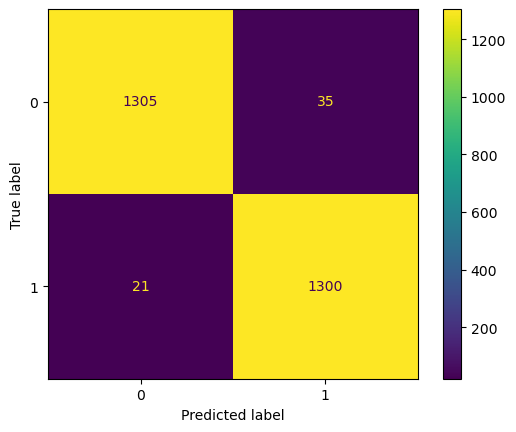

In [33]:
ConfusionMatrixDisplay.from_predictions(y_clf_test, y_clf_pred)
plt.show()

<h1>Predicting how much will customer spend</h1>

In [28]:
y_reg_pred = reg_model.predict(X_test)

print("Regression Model (Spending Next Week):")
print(f"Mean Absolute Error: {mean_absolute_error(y_reg_test, y_reg_pred)}")
print(f"R-squared: {r2_score(y_reg_test, y_reg_pred)}")


Regression Model (Spending Next Week):
Mean Absolute Error: 206.15995577148857
R-squared: 0.7041296808081345


# Q-2

In [65]:
#!pip install lifetimes

In [66]:
#!pip install scikit-mobility

## Python Packages for CLV

1. *lifetimes*
* Popular package for CLV using probabilistic models (e.g., BG/NBD, Gamma-Gamma).
  
2. *scikit-mobility*
* Mainly used for mobility data but can be adapted for CLV in transactional settings.

3. *clv-tools*
* Built for marketing analysis, focusing on customer retention and value prediction.

In [186]:
# Read the csv file
data = pd.read_csv('dataset_from_impala.csv')
data['created_date'] = pd.to_datetime(data['created_date'], errors='coerce')

print(data['created_date'].isnull().sum())

0


In [188]:
# Prepare RFM metrics 
lifetimes_data = summary_data_from_transaction_data(
    data,
    customer_id_col='user_id',         
    datetime_col='created_date',      
    monetary_value_col='nettotalprice'  
)

print(lifetimes_data.head())

          frequency  recency      T  monetary_value
user_id                                            
0.00E+00        2.0    137.0  179.0     1680.909985
001cf           0.0      0.0   39.0        0.000000
001gt           2.0     43.0  113.0     4207.269898
0021c           0.0      0.0   88.0        0.000000
002ef           0.0      0.0  123.0        0.000000


In [190]:
# Fit BetaGeoFitter for Purchase Prediction
bgf = BetaGeoFitter()
bgf.fit(lifetimes_data['frequency'], lifetimes_data['recency'], lifetimes_data['T'])

# Take note that the T stands for reference date

<lifetimes.BetaGeoFitter: fitted with 13302 subjects, a: 0.45, alpha: 10.53, b: 1.27, r: 0.08>

In [192]:
# Predict future transactions
lifetimes_data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    30,  
    lifetimes_data['frequency'], 
    lifetimes_data['recency'], 
    lifetimes_data['T']
)

In [194]:
# Fit GammaGammaFitter for Monetary Prediction
ggf = GammaGammaFitter()

# Filter out rows with monetary_value <= 0 to ensure the model fits correctly
lifetimes_data = lifetimes_data[lifetimes_data['monetary_value'] > 0]

# Fit the Gamma-Gamma model
ggf.fit(lifetimes_data['frequency'], lifetimes_data['monetary_value'])


<lifetimes.GammaGammaFitter: fitted with 1997 subjects, p: 1.11, q: 42.73, v: 36603.39>

In [196]:
# Predict Customer Lifetime Value
lifetimes_data['clv'] = ggf.customer_lifetime_value(
    bgf, 
    lifetimes_data['frequency'], 
    lifetimes_data['recency'], 
    lifetimes_data['T'], 
    lifetimes_data['monetary_value'], 
    time=12,  
    discount_rate=0.01  
)

print("Customer Lifetime Value Calculated Using Lifetimes Package:")
print(lifetimes_data[['frequency', 'recency', 'T', 'monetary_value', 'clv']].head())


Customer Lifetime Value Calculated Using Lifetimes Package:
          frequency  recency      T  monetary_value          clv
user_id                                                         
0.00E+00        2.0    137.0  179.0     1680.909985  2223.609390
001gt           2.0     43.0  113.0     4207.269898  2229.606926
005ed           1.0     47.0  165.0     1149.090015   741.047217
069a4           1.0      8.0   61.0      108.180000  1279.872690
09aef           1.0     30.0  111.0     1362.729980  1018.738178


### Comparison

After comparing the manual calculations with the python package Lifetimes there is a signifance difference in the rfm metrics.